# TP4 Ciencia de datos - Redes

## 1. Creación del Grafo
A partir del archivo de datos, genere el grafo de colaboraciones entre autores. Cuente el n´umero de
nodos y aristas. Haga una representación gráfica del grafo.

In [9]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import csv
import networkx as nx
import seaborn
from random import choice
import operator

def get_autores(linea):
    autores = linea[3]
    car = '\/ .~-()`'
    for c in car:
        autores = autores.replace(c, '')
    return autores.upper().split('&')

def add_paper(G, linea):
    autores = get_autores(linea)
    
    for autor in autores:
        G.add_node(autor)
    
    e = 1
    for autor in autores:
        if e < len(autores):
            edges = zip([autor]*(len(autores)-e), autores[e:])
            G.add_edges_from(edges)
        e = e + 1

In [3]:
with open('data.csv', 'r') as data:
    papers = csv.reader(data)
    G = nx.Graph()
    for paper in papers:
        add_paper(G, paper)

cant_nodos = len(list(G.nodes()))
cant_aristas = len(list(G.edges()))
print("Cantidad de nodos: " + str(cant_nodos))
print("Cantidad de aristas: " + str(cant_aristas))

Cantidad de nodos: 3935
Cantidad de aristas: 7820


## 2. Distribución de Grado
Grafique la distribución del grado de los autores, en escalas lineales, semilogarítmica, y log-log. Argumente,a partir de los gráficos, de qué tipo de distribución se trata. 

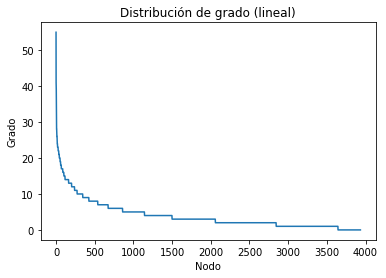

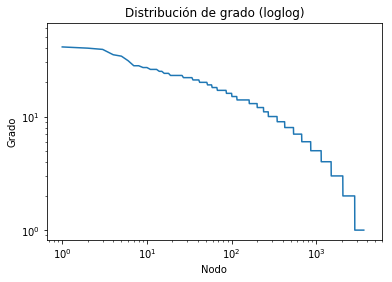

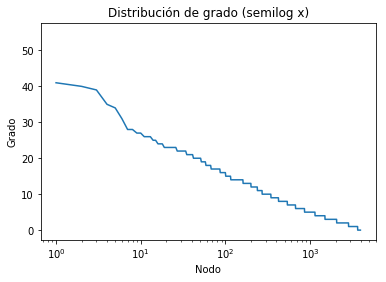

In [4]:
dg = sorted([e[1] for e in list(nx.degree(G))], reverse=True)  

plt.plot(dg)
plt.title('Distribución de grado (lineal)')
plt.xlabel('Nodo')
plt.ylabel('Grado')
#plt.savefig('graficos/dg_lineal.jpg', dpi=300)
#plt.close()
plt.show()

plt.loglog(dg)
plt.title('Distribución de grado (loglog)')
plt.xlabel('Nodo')
plt.ylabel('Grado')
#plt.savefig('graficos/dg_loglog.jpg', dpi=300)
#plt.close()
plt.show()

plt.semilogx(dg)
plt.title('Distribución de grado (semilog x)')
plt.xlabel('Nodo')
plt.ylabel('Grado')
#plt.savefig('graficos/dg_semilogx.jpg', dpi=300)
#plt.close()
plt.show()

Se trata de una distribución exponencial, porque al ser representada en una gráfica semilog en x se comporta de forma aproximadamente lineal. 

## 3. Componentes Conexas
Calcule el número de componentes conexas del grafo. Muestre el tamaño de la componente mayor, o componente gigante.

In [5]:
ncc = nx.number_connected_components(G)
print("Numero de componentes conexas: " + str(ncc))
    
    # cg es la componente gigante
cg = max(nx.connected_component_subgraphs(G), key=len)
tamcg = len(list(cg.nodes()))
print("Tamaño de la componente gigante: " + str(tamcg))

Numero de componentes conexas: 513
Tamaño de la componente gigante: 3011


## 4. Tamaños de Vecindades
Trabajando con la componente gigante del grafo, estudie, parándose en un nodo al azar, cómo aumenta
el número de autores alcanzados a medida que se aleja del nodo semilla. Grafique el número de autores
alcanzados en función de la distancia al nodo semilla. Grafique también el número de nuevos autores
que se agregan en cada paso, y estime el máximo de esta función. Pruebe con varios nodos semillas y
analice la robustez de este resultado. Discuta el significado de los gráficos y su relación con el fenómeno
de seis grados de separación.

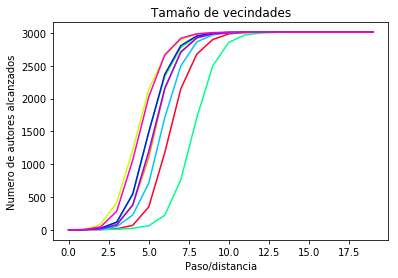

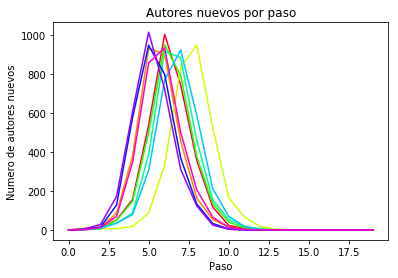

Paso asociado al mayor número de autores nuevos - valor medio de todas las iteraciones 6.33333333333


In [11]:
def tamañoVecino(cg):
    a=[]
    c=[]
    random_node = choice(list(cg.nodes()))
    for i in range (0,20):
        b=[]
        b=nx.ego_graph(cg, random_node, radius=i, center=False)
        if i==0:
            c.append(len(b))
        else:   
            c.append(len(b)-(a[i-1]))
 
        a.append(len(b))
    return a , c , c.index(max(c))

iterations=np.arange(1,10,1)
n= len(iterations)
colors = mpl.cm.gist_rainbow(np.linspace(0, 1, n))
maximos=[]

fig, ax = plt.subplots()
for color, i in zip(colors, iterations):
    ax.plot(tamañoVecino(cg)[0],color=color)
plt.title('Tamaño de vecindades')
plt.xlabel('Paso/distancia')
plt.ylabel('Numero de autores alcanzados')
#plt.savefig('graficos/tamañodeVecindades1.jpg', dpi=300)
#plt.close()
plt.show()

fig, ax1 = plt.subplots()
for color, i in zip(colors, iterations):
    ax1.plot(tamañoVecino(cg)[1],color=color)
    maximos.append(tamañoVecino(cg)[2])
plt.title('Autores nuevos por paso')
plt.xlabel('Paso')
plt.ylabel('Numero de autores nuevos')
#plt.savefig('graficos/tamañodeVecindades2.jpg', dpi=300)
#plt.close()
plt.show()

print('Paso asociado al mayor número de autores nuevos - valor medio de todas las iteraciones ' + str(np.mean(maximos)))

En ambos gráficos se evidencia que alrededor de los seis grados de separación existe una suerte de punto de inflexión en las curvas, a partir de ese valor el número de autores nuevos por paso empieza a decrecer. Por lo tanto, se evidencia que con 6 grados de separación se puede alcanzar a casi todos los nodos de la componente gigante. Esto correlaciona perfectamente con lo que se conoce como "fenómeno de los 6 grados de separación".    

## 5. Mundos Pequeños
Compute el coeficiente de clustering C y el camino mínimo medio l para la componente gigante. Genere
un grafo aleatorio con la misma distribución de grado y compute las mismas medidas para este grafo.
Compare e interprete los resultados. ¿Se trata de un grafo con estructura de mundos pequeños?

Grafo componente gigante


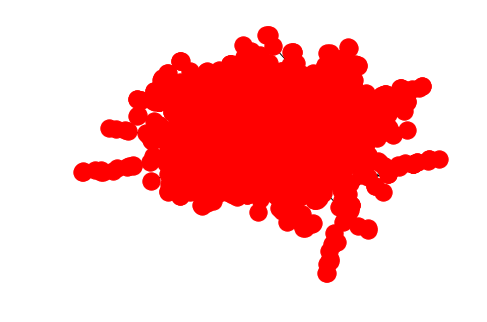

Coeficiente de clustering C para cg: 0.48310150955377634
Camino mínimo medio l para cg: 6.104922041109509
Random Grafo


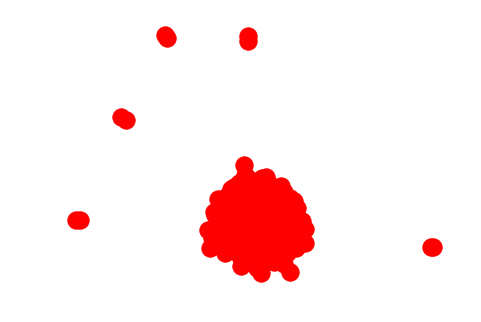

Coeficiente de clustering C para rg: 0.0034589259460581826


NetworkXError: Graph is not connected.

In [7]:
print('Grafo componente gigante')
nx.draw(cg)  # networkx draw()
plt.draw()  # pyplot draw()
plt.show()


C= nx.average_clustering(cg)
print("Coeficiente de clustering C para cg: " + str(C))

l=nx.average_shortest_path_length(cg)
print("Camino mínimo medio l para cg: " + str(l))   

#random graph con la misma distribucón de grado    
rg = nx.random_degree_sequence_graph(sorted([e[1] for e in list(nx.degree(cg))], reverse=True))     

print('Random Grafo')
nx.draw(rg)  # networkx draw()
plt.draw()  # pyplot draw()
plt.show()

print("Coeficiente de clustering C para rg: " + str(nx.average_clustering(rg)))    
print("Camino mínimo medio l para rg: " + str(nx.average_shortest_path_length(rg)))

Una Red de mundo pequeño es un tipo de grafo para el que la mayoría de los nodos no son vecinos entre sí, y sin embargo la mayoría de los nodos pueden ser alcanzados desde cualquier nodo origen a través de un número relativamente corto de saltos entre ellos.

## 6. Estrellas
Discuta cómo haría para individulizar a los autores “estrella” del campo. Evalúe quiénes son estos autores
según por lo menos dos métricas diferentes. Analice qué sucedería con la comunidad si estos autores
desapareciesen. En particular, determine cuántos autores deberían desaparecer para que desaparezca
la componente gigante del grafo.

In [10]:
degree_dict = dict(cg.degree(cg.nodes())) # Run degree centrality
betweenness_dict = nx.betweenness_centrality(cg) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(cg) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
nx.set_node_attributes(cg, degree_dict, 'degree')

sorted_degree = sorted(degree_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_betweenness = sorted(betweenness_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_eigenvector = sorted(eigenvector_dict.items(), key=operator.itemgetter(1), reverse=True)

#top 20 nodes by degree as a list
top_degree = sorted_degree[:20]
print("Top 20 nodos por Degree")
for td in top_degree:
    print("Name:", td[0], "| Degree Centrality:", td[1])
print(" ")


#top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]


print("Top 20 nodos por Betweenness")
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    eigenvector=eigenvector_dict[tb[0]]
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree, "| Eigenvector:", eigenvector)

print(" ")

#top 20 nodes by eigenvector as a list
top_eigenvector = sorted_eigenvector[:20]
print("Top 20 nodos por Eigenvector")
for te in top_eigenvector: 
    degree = degree_dict[te[0]] 
    betweenness=betweenness_dict[te[0]]
    print("Name:", te[0], "| Eigenvector Centrality:", te[1], "| Degree:", degree, "| Betweenness:", eigenvector)

Top 20 nodos por Degree
Name: LEE | Degree Centrality: 55
Name: AMBJORN | Degree Centrality: 41
Name: PARK | Degree Centrality: 40
Name: KIM | Degree Centrality: 39
Name: FERRARA | Degree Centrality: 35
Name: VAFA | Degree Centrality: 34
Name: STROMINGER | Degree Centrality: 31
Name: ODINTSOV | Degree Centrality: 28
Name: GIBBONS | Degree Centrality: 28
Name: POPE | Degree Centrality: 27
Name: LU | Degree Centrality: 27
Name: IVANOV | Degree Centrality: 26
Name: ZHANG | Degree Centrality: 26
Name: DAS | Degree Centrality: 26
Name: KLEBANOV | Degree Centrality: 25
Name: SEIBERG | Degree Centrality: 25
Name: JOHNSON | Degree Centrality: 24
Name: NIEUWENHUIZEN | Degree Centrality: 24
Name: GRISARU | Degree Centrality: 24
Name:  | Degree Centrality: 23
 
Top 20 nodos por Betweenness
Name: LEE | Betweenness Centrality: 0.07846171774755194 | Degree: 55 | Eigenvector: 0.00023531349165343337
Name: VAFA | Betweenness Centrality: 0.05497143675504375 | Degree: 34 | Eigenvector: 0.0003007878534429

Degree es la forma más común de identificar nodos importantes. Los nodos con mayor degree en nuestro caso, son los autores con mayor cantidad de publicaciones.

Eigenvector es como una extensión de degree, es una suerte de combinación de aristas de ese nodo y aristas de los nodos vecinos. Esta medida en nuestro caso representaria no solo la cantidad de publicaciones de ese nodo sino la cantidad de publicaciones de los nodos vecinos. De alguna forma evalúa qué nodos pueden obtener información de otros nodos más rápido.

Betweenness, por otro lado, mira todos los "caminos más cortos" que pasan por un nodo particular. Es una medida buena para identificar nodos que conectan dos partes de la red que de otra forma estarían desconectadas. Identifica nodos que son importantes no por su cantidad de conexiones, sino por ser puente entre grupos, dándole a la red conectividad y cohesión.


